In [88]:
!python --version

Python 3.12.11


#**Telco Customer Churn Prediction**


---

This notebook analyzes telecom customer data to predict churn and find out what are the key factors for customer retention.

### **1. Import Libraries and Load the data:**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Upoad the csv file from local drive:

In [90]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's examine the dataframe to see how many columns and rows there are, what data types it contains and what are the characteristics of the data:

In [91]:
df.shape

(7043, 21)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [93]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##**2. Exploratory Data Analysis**


---






Now that we have inspected the data and found that it is clean let's proceed with the exploratory data analysis.



Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


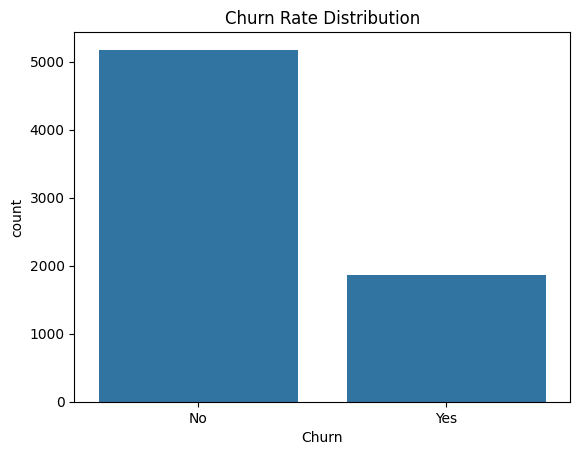

In [94]:
churn_rate = df['Churn'].value_counts(normalize = True)*100
print(churn_rate)


sns.countplot(x = 'Churn', data = df)

plt.title('Churn Rate Distribution')
plt.show()



We have a 26% Churn rate. Let's examine our numerical attributes to check for trends or relationships that might predict churn.

In [95]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

np.int64(11)

In [96]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [97]:
df[['tenure', 'MonthlyCharges','TotalCharges' ]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


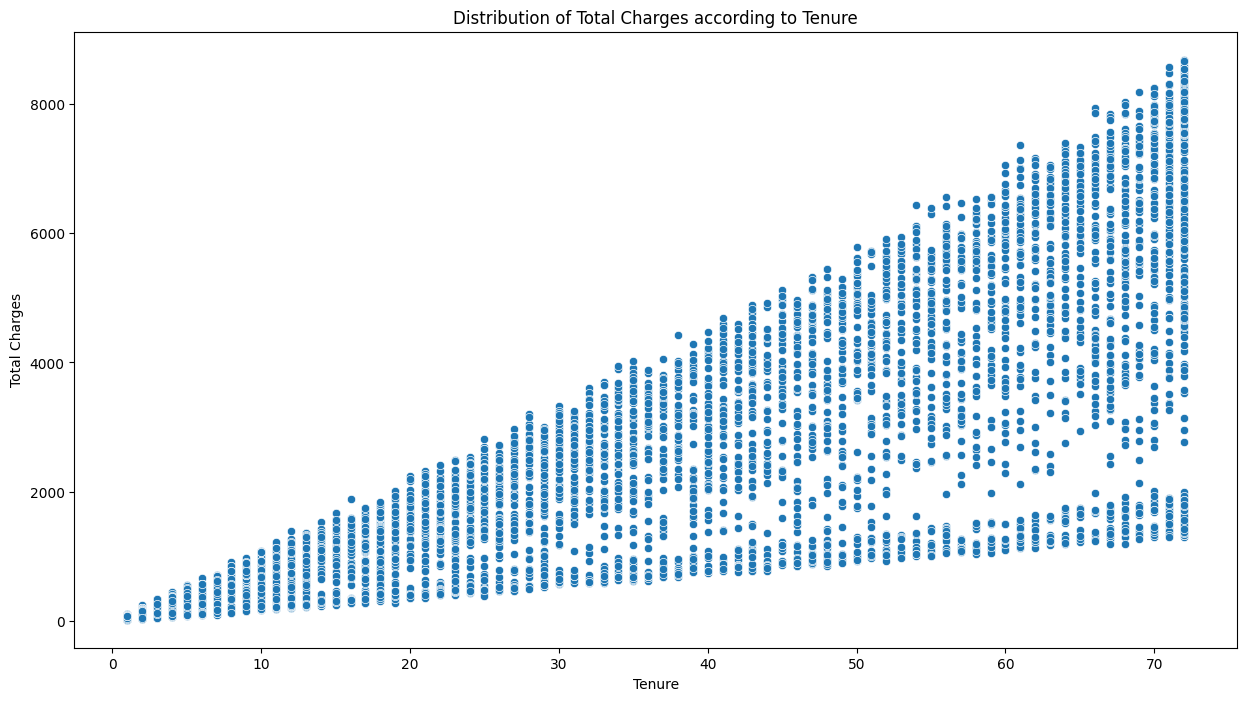

In [98]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x='tenure', y='TotalCharges')

plt.title("Distribution of Total Charges according to Tenure")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

plt.show()

We can naively say that as tenure increases TotalCharges also increases. Let us examine other attributes:`

In [99]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


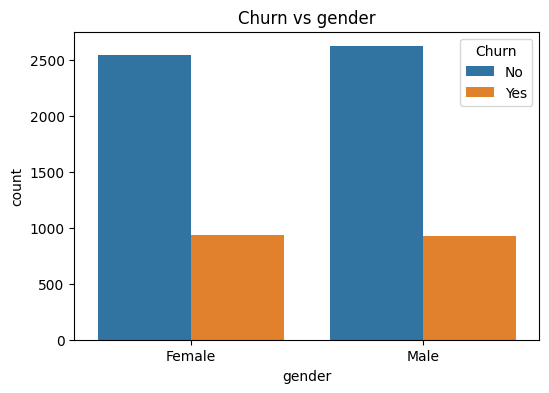

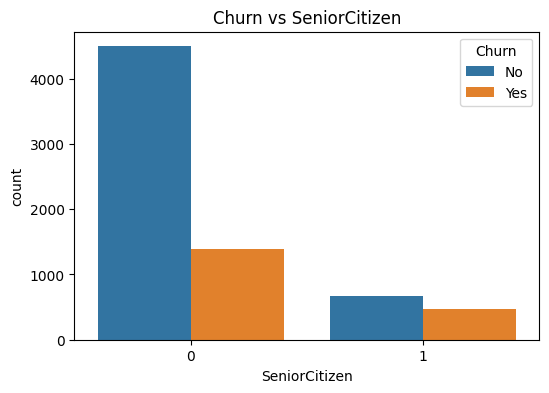

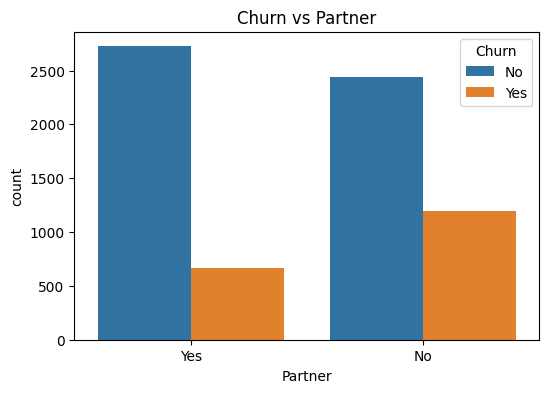

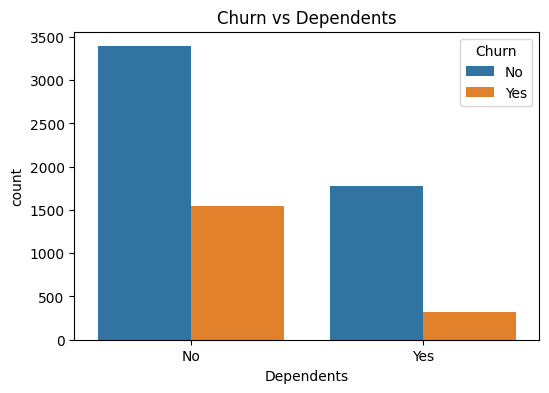

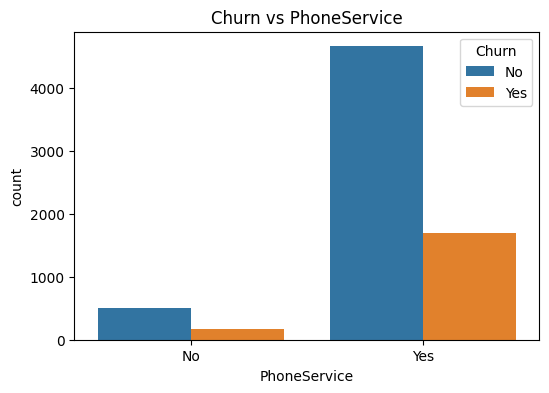

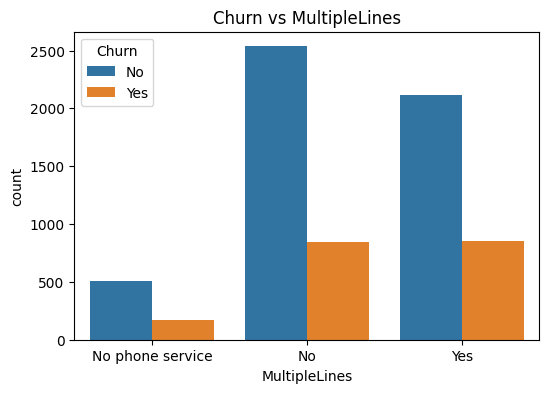

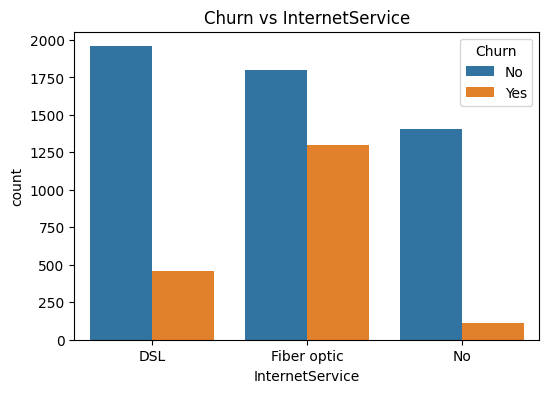

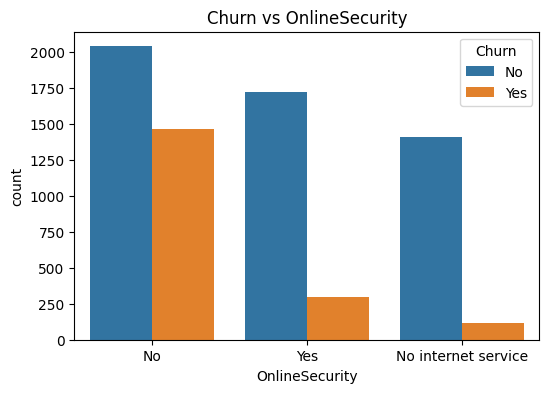

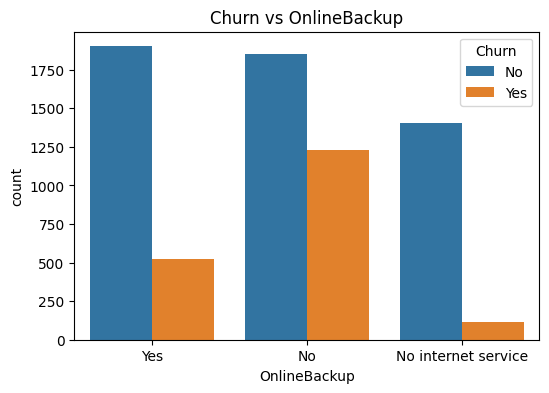

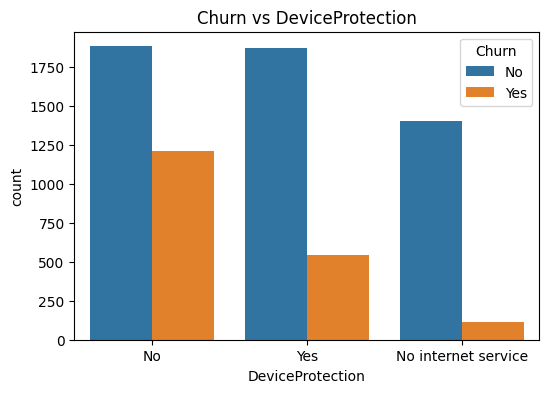

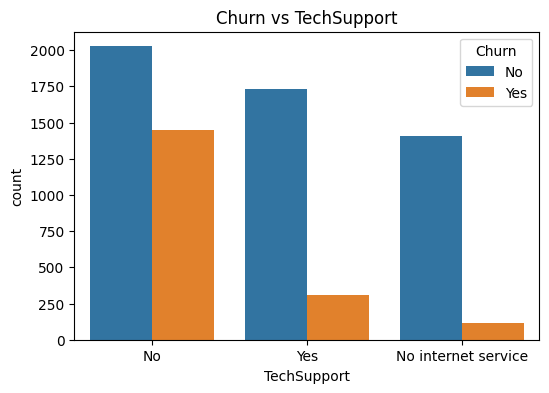

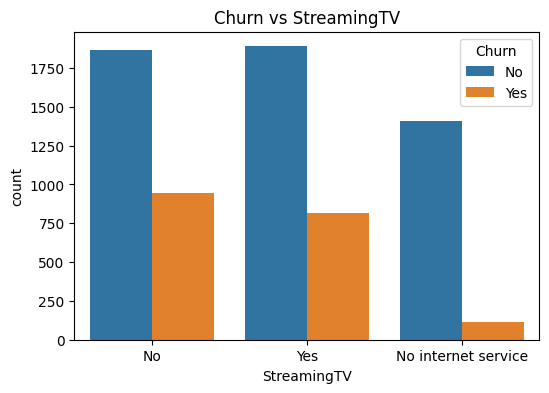

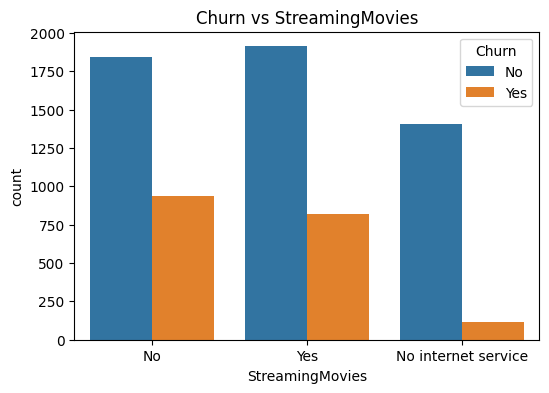

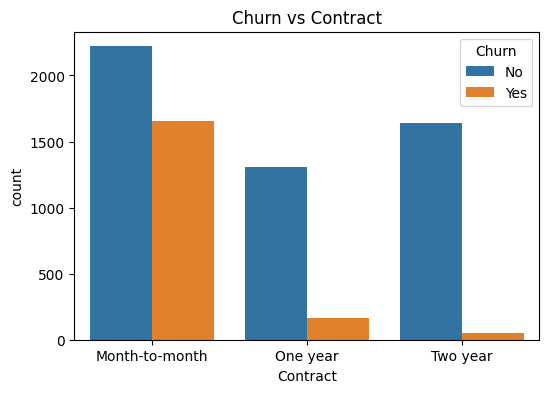

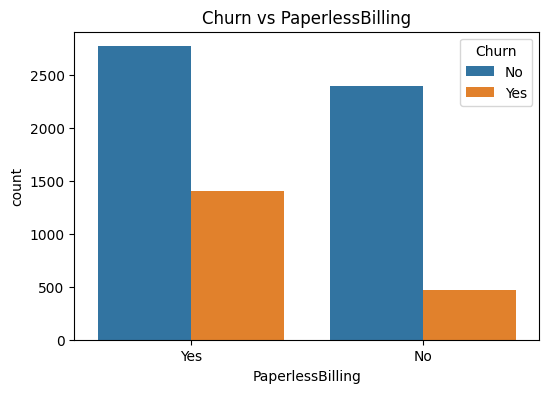

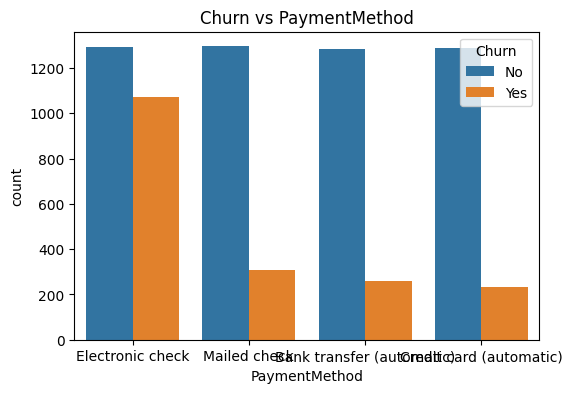

In [100]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for col in cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, hue='Churn', data=df)

  plt.title('Churn vs '+col)
  plt.xticks()
  plt.tight_layout
  plt.show()

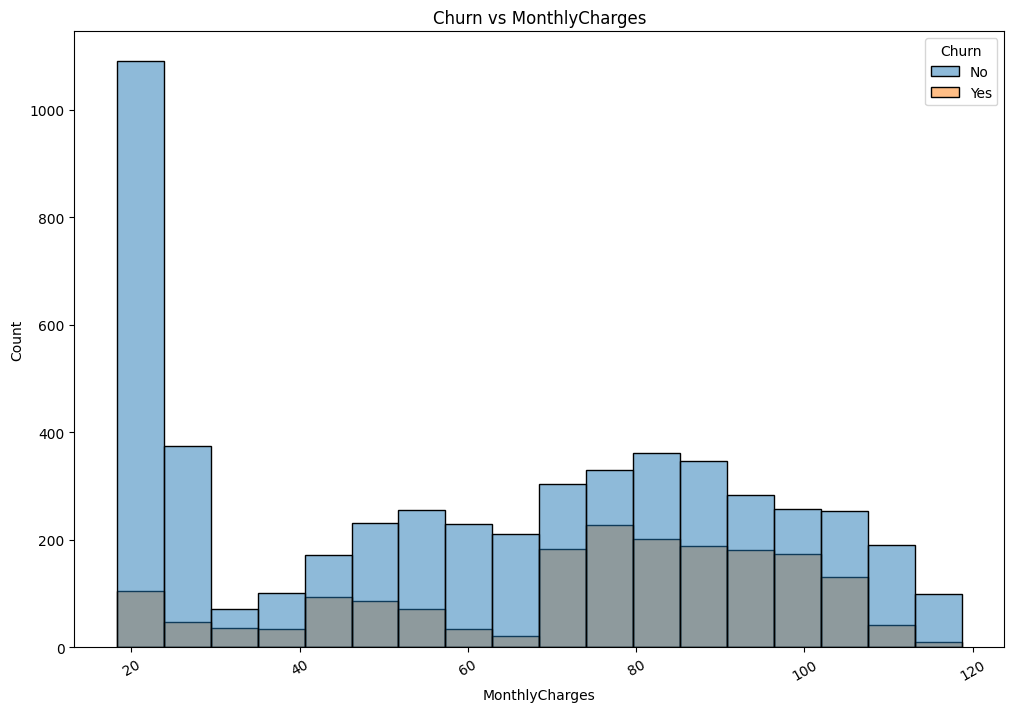

In [101]:
plt.figure(figsize=(12, 8))

sns.histplot(x='MonthlyCharges', hue='Churn', data=df)

plt.title('Churn vs MonthlyCharges')
plt.xticks(rotation=30)
plt.tight_layout

plt.show()

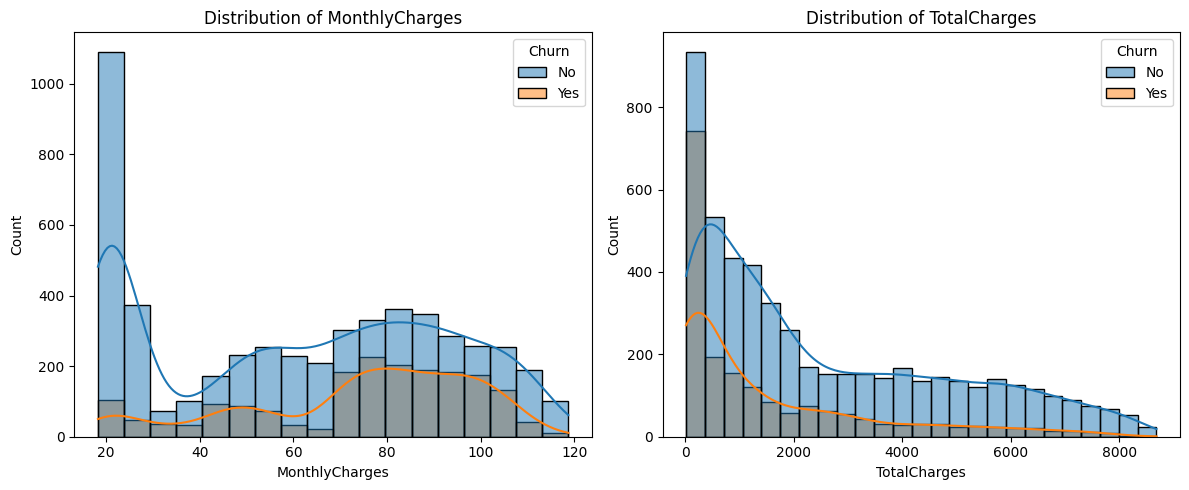

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MonthlyCharges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of MonthlyCharges')
axes[0].set_xlabel('MonthlyCharges')

# TotalCharges
sns.histplot(data = df, x='TotalCharges', hue='Churn', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of TotalCharges')
axes[1].set_xlabel('TotalCharges')

plt.tight_layout()
plt.show()

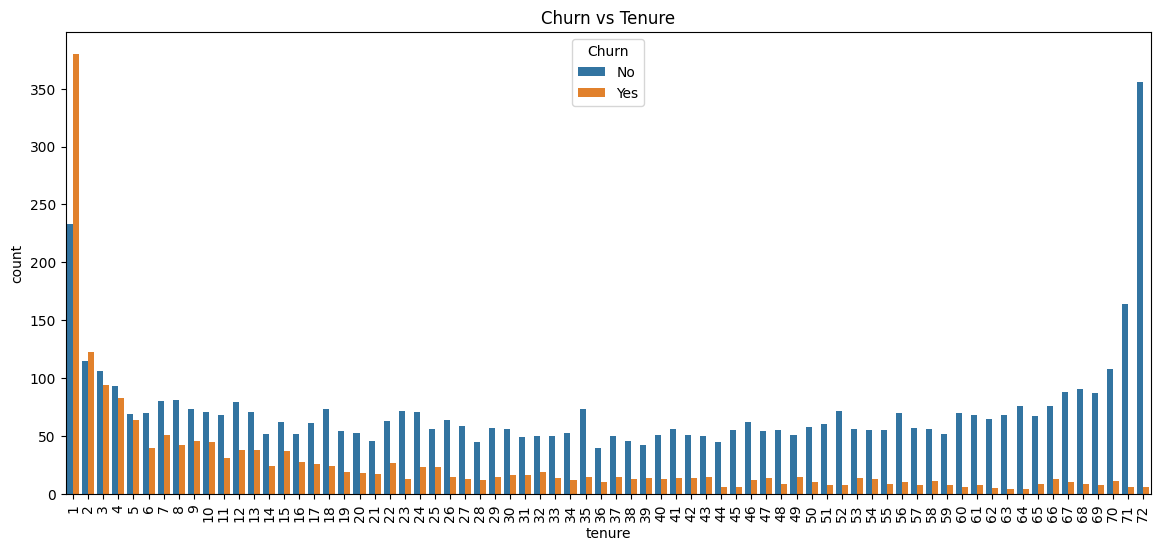

In [103]:
plt.figure(figsize=(14,6))

sns.countplot(x='tenure', hue='Churn', data=df)

plt.title('Churn vs Tenure')
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

##**3. Statistical Validation**


---


Now that we have completed the exploratory data analysis (EDA), let us perform a few statistical tests to validate our observations.

This step helps confirm if the patterns we observed are statistically significant or not and also allow us to streamline the next stage of feature engineering and modeling.  

We want to eliminate co-dependent variables early so we can avoid redundancy, reduce noise and save time and resources by feeding fewer columns to the machine algorithms.

####Chi-square Test for Contract type vs Churn



In [104]:
from scipy.stats import chi2_contingency

#contingency table
contract_churn = pd.crosstab(df['Contract'], df['Churn'])

#chi-square test
chi2, p, dof, ex = chi2_contingency(contract_churn)

print(contract_churn)
print(f"\nChi-square statistic = {chi2:.2f}, p-value = {p:.4f}")

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48

Chi-square statistic = 1179.55, p-value = 0.0000


**Result:**

The Chi squared test for independence between **Contract type** vs **Churn** yeilded a χ² of **1179.55** and a p-value **< 0.0001**

**Interpretation:**

The chi squared test shows that *contract type* and *churn* are heavily related, we therefore **reject the null hypothesis** that there's no relation between contract type and churn. This means that it is very highly likely for customers on a **month-on-month** contract to cancel their services than those on a 1-year or 2 years contract.

###Chi-Squared Test for Billing Type vs Churn:


In [105]:
billing_type_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'])

chi2, p, dof, ex = chi2_contingency(billing_type_churn)

print(billing_type_churn)
print(f"\nChi-square score = {chi2:.2f}, p-value={p:.4f}")

Churn               No   Yes
PaperlessBilling            
No                2395   469
Yes               2768  1400

Chi-square score = 256.87, p-value=0.0000


**Result:**

The chi-square test for independence between **Billing Type** and **Churn** came up with a chi-square value of **256.87** and a p-value of **<0.0001**

**Interpretation:**

Since **p-value** is well below **0.04** we reject the null hypothesis that the billing type has no relation to churn. Paperless billing types significantly contribute to churn as observed in our EDA, *with electronic check* leading to highest churn.

###Boxplot and T-test for Tenure vs Churn:

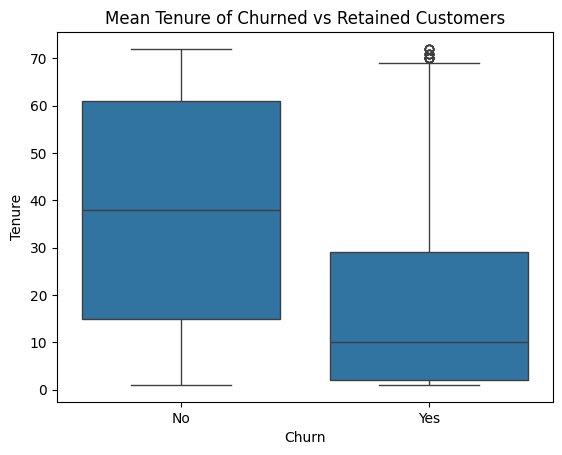

T-statistic = -34.97, p-value = 0.0000


In [106]:
from scipy.stats import ttest_ind

#visualization
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Mean Tenure of Churned vs Retained Customers')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.tight_layout
plt.show()

# t-test
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

t_stat, p_val = ttest_ind(churn_yes, churn_no, equal_var=False)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

**Result:**
The independent t-test comparing the mean tenure of churned vs mean tenure of retained customers got the results of **T-statistic is -34.97** and the **p-value is <0.0001**

**Interpretation:**
Since the p-value is below **0.05** we reject the null hypothesis and conclude that there is a **statistically significant difference** between the mean tenure of the customers who churned and the mean tenure of customers who stayed. Since the **T-statistic is negative** it means that the mean tenure of customers who churned is much lower that those who stayed. This confirms our EDA observation that customers with shorter relationship with the company are more likely to churn.

####

###**4. Feature Engineering**


---
Before training the machine learning models we will prepare our telco dataset by encoding categorical variables, scaling numerical variables, and splitting the dataset into training data and testing data.


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [108]:
#for modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#for evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

####Data Preparation and Encoding

In [109]:
# Make copy of dataframe
df_encoded = df.copy()

# Convert 'Churn' to binary
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Identify binary categorical columns
binary_cols = ['Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Label encode binary columns (Yes/No → 1/0)
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

#encoding gender
df_encoded['gender'] = df_encoded['gender'].map({'Male': 1, 'Female': 0})

# One-hot encode multi-category columns
multi_cols = ['InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df_encoded, columns=multi_cols, drop_first=True)

# Drop non-predictive column
df_encoded.drop('customerID', axis=1, inplace=True, errors='ignore')

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [110]:
# -------------------------------
# Handle Missing Values
# -------------------------------
# Fill missing values in service-related columns with 0
# (since missing = customer does not have that service)

cols_with_nans = X_train.columns[X_train.isna().sum() > 0]

X_train[cols_with_nans] = X_train[cols_with_nans].fillna(0)
X_test[cols_with_nans] = X_test[cols_with_nans].fillna(0)

# Confirm data has no missing values
print(X_train.isna().sum().sum(), X_test.isna().sum().sum())



0 0


In [111]:
# -------------------------------
# Scale Numerical Features
# -------------------------------
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [112]:
df_encoded.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,NaN,0.0,1.0,0.0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0.0,1.0,0.0,1.0,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0.0,1.0,1.0,0.0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,NaN,1.0,0.0,1.0,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,70.70,151.65,1,True,False,False,False,False,True,False
5,0,0,0,0,8,1,1.0,0.0,0.0,1.0,...,99.65,820.50,1,True,False,False,False,False,True,False
6,1,0,0,1,22,1,1.0,0.0,1.0,0.0,...,89.10,1949.40,0,True,False,False,False,True,False,False
7,0,0,0,0,10,0,NaN,1.0,0.0,0.0,...,29.75,301.90,0,False,False,False,False,False,False,True
8,0,0,1,0,28,1,1.0,0.0,0.0,1.0,...,104.80,3046.05,1,True,False,False,False,False,True,False
9,1,0,0,1,62,1,0.0,1.0,1.0,0.0,...,56.15,3487.95,0,False,False,True,False,False,False,False


In [113]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          6352 non-null   float64
 7   OnlineSecurity                         5512 non-null   float64
 8   OnlineBackup                           5512 non-null   float64
 9   DeviceProtection                       5512 non-null   float64
 10  TechSupport                            5512 non-null   float64
 11  Streaming

In [114]:
internet_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Fill NaNs in internet service columns with 0
df_encoded[internet_service_cols] = df_encoded[internet_service_cols].fillna(0)

# Fill NaNs in MultipleLines (caused by 'No phone service') with 0
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].fillna(0)


In [115]:
# Confirm numerical features are scaled
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,5.625000e+03,5.625000e+03,5.625000e+03
mean,-1.291609e-16,3.157968e-17,8.842310e-18
std,1.000089e+00,1.000089e+00,1.000089e+00
min,-1.286145e+00,-1.547843e+00,-1.003365e+00
25%,-9.601500e-01,-9.698847e-01,-8.301191e-01
50%,-1.451620e-01,1.860324e-01,-3.918414e-01
75%,9.550717e-01,8.320837e-01,6.591681e-01
max,1.607062e+00,1.782062e+00,2.805224e+00


In [116]:
#double checking if the NaN's are gone:
df_encoded.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [117]:
service_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace NaNs in service-related columns with 0 (meaning "no service")
X_train[service_cols] = X_train[service_cols].fillna(0)
X_test[service_cols] = X_test[service_cols].fillna(0)


In [118]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

###**5. Model Training and Evaluation**


---



In [120]:
# modles comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'ROC-AUC': roc
    })

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Compare results in a DataFrame
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\nModel Comparison:\n")
display(results_df)


===== Logistic Regression =====
Accuracy: 0.8031
ROC-AUC: 0.8362
Confusion Matrix:
 [[918 115]
 [162 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


===== Random Forest =====
Accuracy: 0.7854
ROC-AUC: 0.8217
Confusion Matrix:
 [[922 111]
 [191 183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:29:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
Accuracy: 0.7783
ROC-AUC: 0.8196
Confusion Matrix:
 [[890 143]
 [169 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407


Model Comparison:



,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.803127,0.836206
1,Random Forest,0.785359,0.821681
2,XGBoost,0.778252,0.819649


/tmp/ipython-input-3863609819.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients.head(10), x='Coefficient', y='Feature', palette='Blues_r')


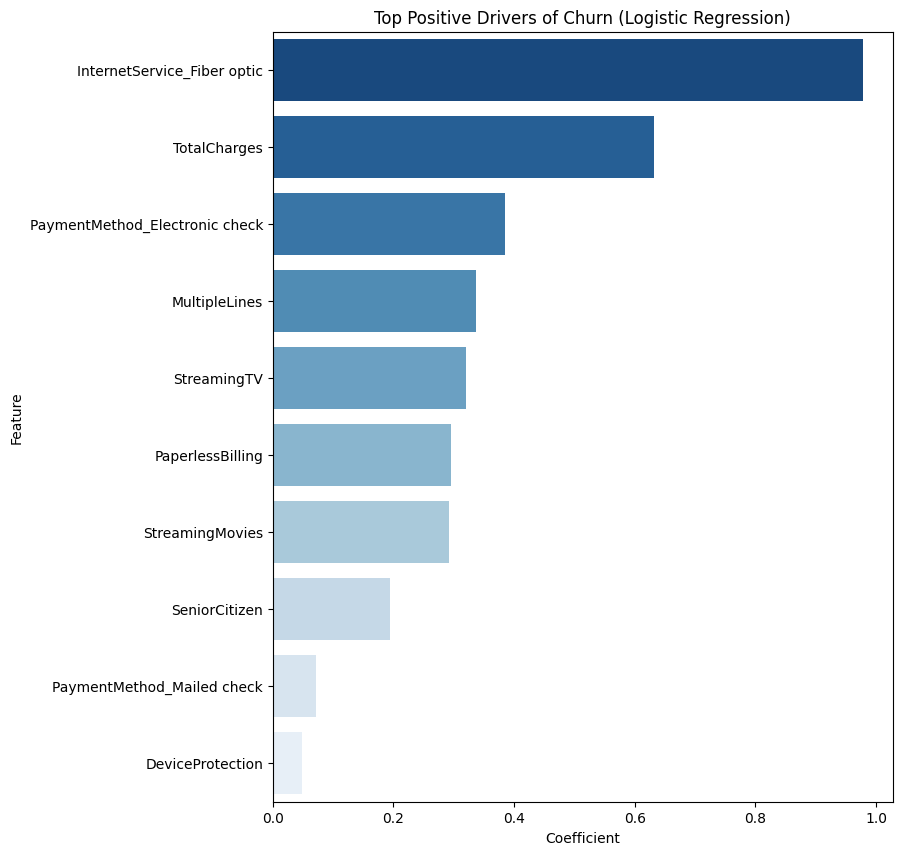

/tmp/ipython-input-3863609819.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients.tail(10), x='Coefficient', y='Feature', palette='Greens')


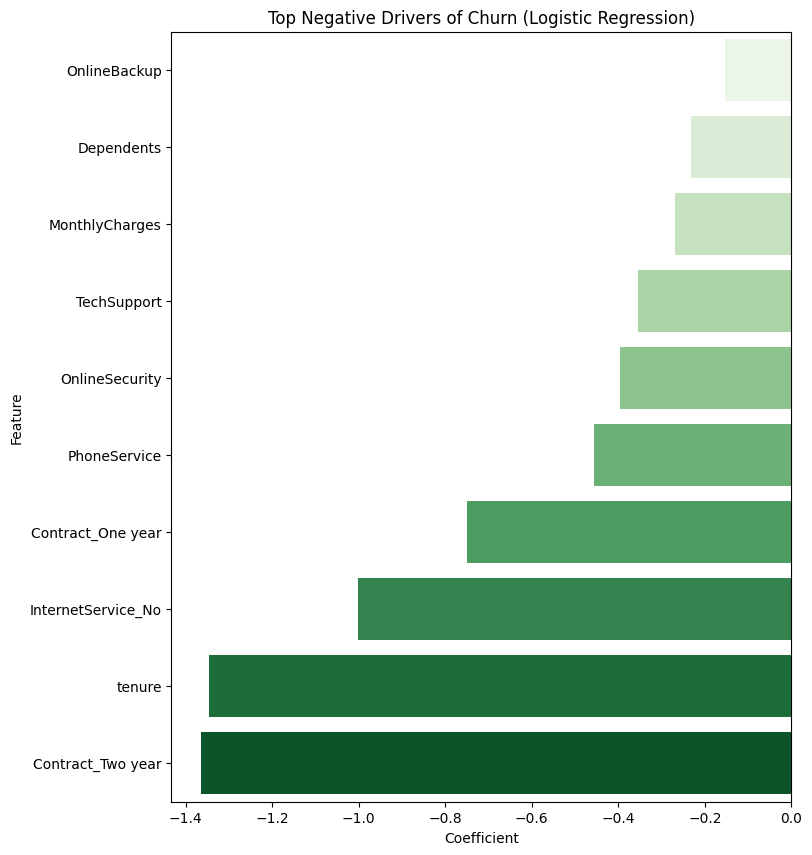

/tmp/ipython-input-3863609819.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='mako')


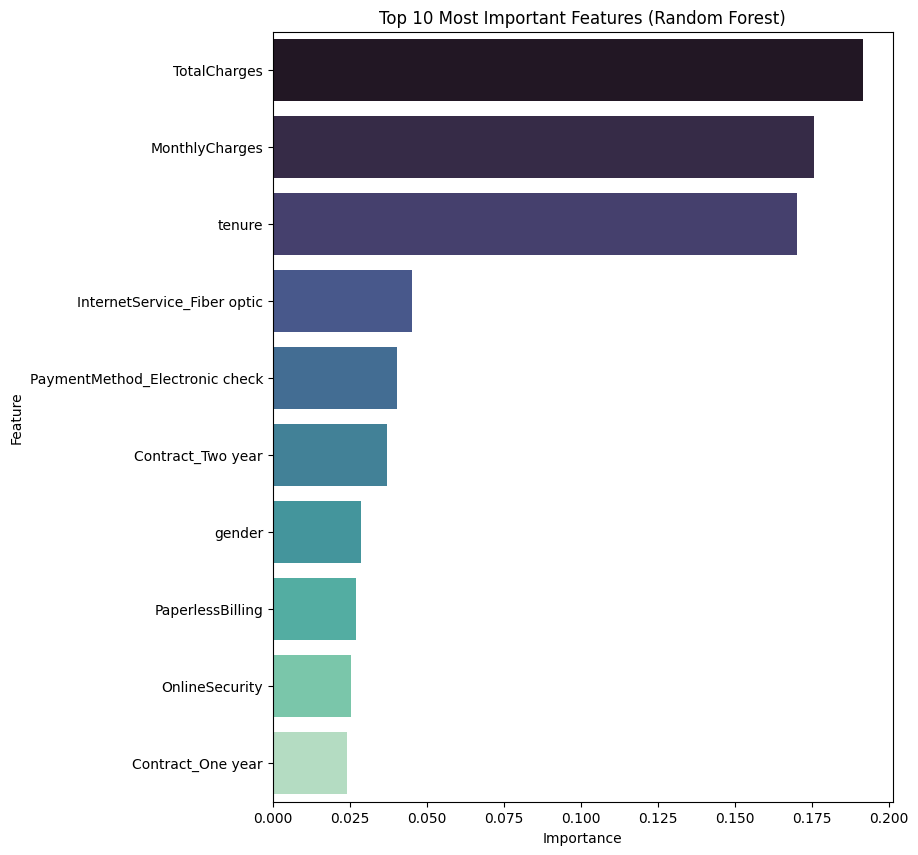

In [121]:

# Logistic Regression coefficients:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(data=coefficients.head(10), x='Coefficient', y='Feature', palette='Blues_r')
plt.title("Top Positive Drivers of Churn (Logistic Regression)")
plt.show()

plt.figure(figsize=(8,10))
sns.barplot(data=coefficients.tail(10), x='Coefficient', y='Feature', palette='Greens')
plt.title("Top Negative Drivers of Churn (Logistic Regression)")
plt.show()


# Random Forest feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='mako')
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()
